In [1]:
!pip install imblearn
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
icu_data = pd.read_csv('/kaggle/input/icu-dataset/icu_data_Median.csv')
icu_data.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,age,gender,...,zafirlukast,zanamivir,zeas,zileuton,zinc oxide,zinc oxide-white petrolatum,zolmitriptan,zonisamide,zydis,zz
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,55,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,77,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,57,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,81,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
condition = (icu_data['los'] > 4).map({True: 'Long', False: 'Short'})

# Tạo một cột mới 'los_type' dựa trên điều kiện
icu_data['los_type'] = condition

# Median

In [8]:
# Chia dữ liệu thành dữ liệu training  và dữ liệu validation
from sklearn.model_selection import train_test_split

# Giả sử 'subject_id' là mã định danh bệnh nhân
patient_ids = icu_data['subject_id'].unique()

# Chia patient_ids thành các tập huấn luyện và thử nghiệm
train_patient_ids, validation_patient_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)

# Lọc khung dữ liệu dựa trên sự phân chia của patient_ids
train_data = icu_data[icu_data['subject_id'].isin(train_patient_ids)]
validation_data = icu_data[icu_data['subject_id'].isin(validation_patient_ids)]

# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra
print("Training set shape:", train_data.shape)
print("Validation set shape:", validation_data.shape)

Training set shape: (45901, 5075)
Validation set shape: (11586, 5075)


In [9]:
# lấy cột subject_id duy nhất
patient_ids_train = train_data['subject_id'].unique()

# Chia patient_ids_train thành các tập huấn luyện và thử nghiệm
train_train_ids, test_train_ids = train_test_split(patient_ids_train, test_size=0.2, random_state=42)

# Lọc train_data dựa trên sự phân chia của patient_ids_train
train_train_data = train_data[train_data['subject_id'].isin(train_train_ids)]
test_train_data = train_data[train_data['subject_id'].isin(test_train_ids)]

# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra
print("Train Training set shape:", train_train_data.shape)
print("Train Testing set shape:", test_train_data.shape)

Train Training set shape: (36738, 5075)
Train Testing set shape: (9163, 5075)



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


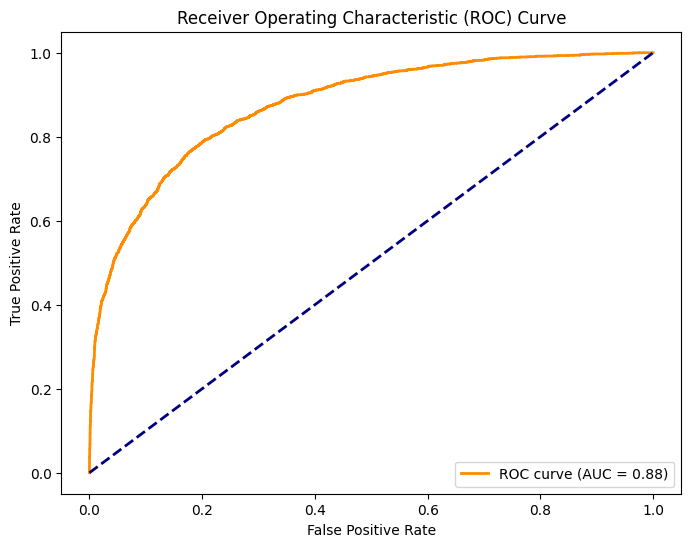

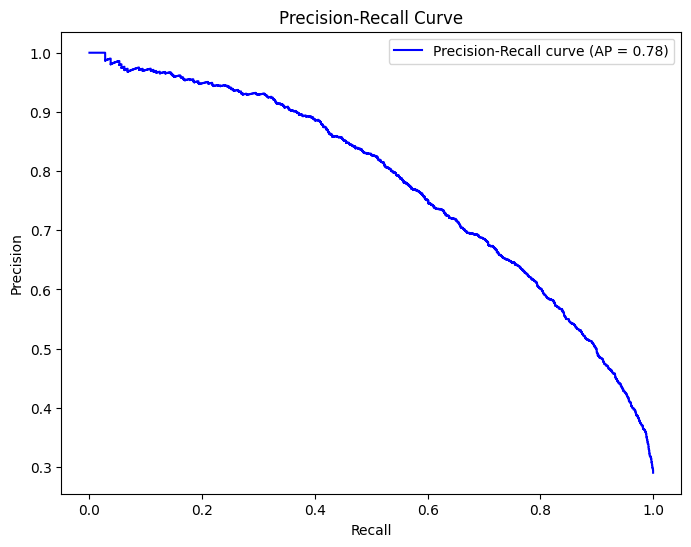

Area under ROC curve (AUC-ROC): 0.88
Area under Precision-Recall curve (AUC-PR): 0.78
Confusion Matrix:
[[5751  753]
 [ 890 1769]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6504
           1       0.70      0.67      0.68      2659

    accuracy                           0.82      9163
   macro avg       0.78      0.77      0.78      9163
weighted avg       0.82      0.82      0.82      9163



In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
!pip install xgboost
import xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in train_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = train_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_train = train_train_data[numeric_columns]
y_train = train_train_data['los_type']
X_test = test_train_data[numeric_columns]
y_test = test_train_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành số (0 và 1)
y_train = y_train.map({'Short': 0, 'Long': 1})
y_test = y_test.map({'Short': 0, 'Long': 1})

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Chuẩn hóa các tính năng nếu cần (tùy chọn nhưng thường có lợi)
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Tạo mô hình và huấn luyện
model = XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train_res, y_train_res)

# Đưa ra dự đoán trên tập kiểm tra
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.4
y_pred = (y_pred_prob >= threshold).astype(int)

# Tạo đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tạo đường cong độ chính xác-thu hồi
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC): {roc_auc:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR): {average_precision:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(cr)


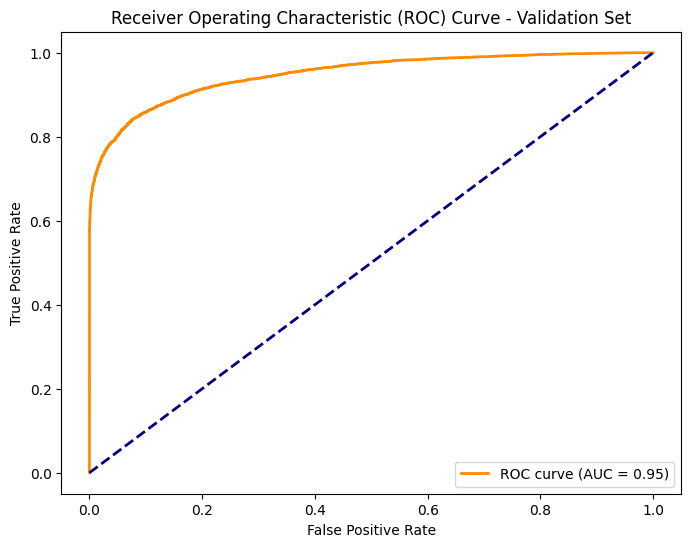

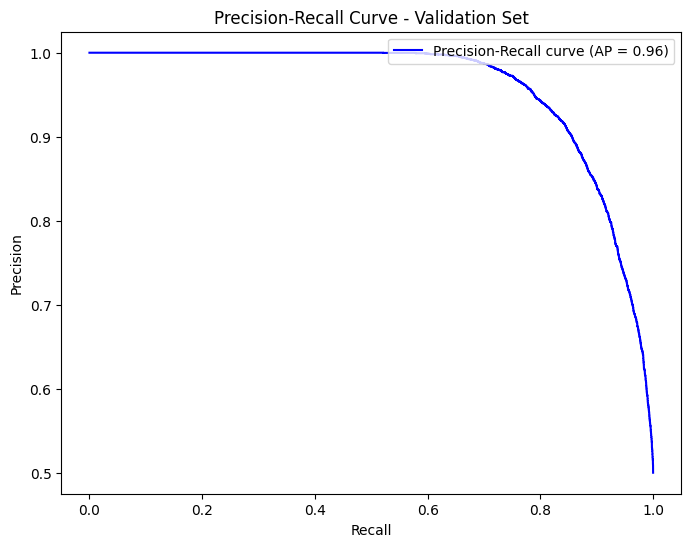

Area under ROC curve (AUC-ROC) for Verification Set: 0.95
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.96
Confusion Matrix for Test Set:
[[7355  947]
 [1099 7203]]

Classification Report for Test Set:

TABLE VII:ClassificationReport forBaseline:MeanImputation

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      8302
           1       0.88      0.87      0.88      8302

    accuracy                           0.88     16604
   macro avg       0.88      0.88      0.88     16604
weighted avg       0.88      0.88      0.88     16604



In [27]:
# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})


# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_verify_res , y_verify = smote.fit_resample(X_verify, y_verify)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
X_verify_res = scaler.transform(X_verify_res)

# Đưa ra dự đoán về tập xác minh bằng cách sử dụng mô hình hiện có
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify, y_verify_pred_prob)


# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify, y_verify_pred)
cr_verify = classification_report(y_verify, y_verify_pred)



print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print()
print('TABLE VII:ClassificationReport forBaseline:MeanImputation')
print()
print(cr_verify)


In [28]:

# Đảm bảo kích thước khớp
min_len = min(len(y_true), len(y_verify_pred))
y_true = y_true[:min_len]
y_verify_pred = y_verify_pred[:min_len]

import pandas as pd

# Chuyển y_verify_pred sang Series với chỉ số tương ứng
y_verify_pred_series = pd.Series(y_verify_pred, index=validation_data.index[:len(y_verify_pred)])

# Đồng bộ hóa y_true với y_verify_pred
y_true = validation_data.loc[y_verify_pred_series.index, 'los_type'].map({'Short': 0, 'Long': 1})

# 'validation_data' có các dự đoán được lưu trữ trong 'y_verify_pred'
cm_verify = confusion_matrix(y_true, y_verify_pred)

# Trích xuất các giá trị từ ma trận nhầm lẫn
tn, fp, fn, tp = cm_verify.ravel()

#  Tính toán tỷ lệ cược cân bằng
equalized_odds_race = (tp / (tp + fn)) / (fp / (fp + tn))

print(equalized_odds_race)


5.912938094141767


# Mean

In [29]:
icu_data = pd.read_csv('/kaggle/input/icu-dataset/icu_data_Median.csv')
icu_data.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,age,gender,...,zafirlukast,zanamivir,zeas,zileuton,zinc oxide,zinc oxide-white petrolatum,zolmitriptan,zonisamide,zydis,zz
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,55,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,77,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,57,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,81,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
condition = (icu_data['los'] > 4).map({True: 'Long', False: 'Short'})

# Tạo một cột mới 'los_type' dựa trên điều kiện
icu_data['los_type'] = condition

In [31]:
# Chia dữ liệu thành dữ liệu training  và dữ liệu validation
from sklearn.model_selection import train_test_split

# Giả sử 'subject_id' là mã định danh bệnh nhân
patient_ids = icu_data['subject_id'].unique()

# Chia patient_ids thành các tập huấn luyện và thử nghiệm
train_patient_ids, validation_patient_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)

# Lọc khung dữ liệu dựa trên sự phân chia của patient_ids
train_data = icu_data[icu_data['subject_id'].isin(train_patient_ids)]
validation_data = icu_data[icu_data['subject_id'].isin(validation_patient_ids)]

# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra
print("Training set shape:", train_data.shape)
print("Validation set shape:", validation_data.shape)

Training set shape: (45901, 5075)
Validation set shape: (11586, 5075)


In [32]:
# lấy cột subject_id duy nhất
patient_ids_train = train_data['subject_id'].unique()

# Chia patient_ids_train thành các tập huấn luyện và thử nghiệm
train_train_ids, test_train_ids = train_test_split(patient_ids_train, test_size=0.2, random_state=42)

# Lọc train_data dựa trên sự phân chia của patient_ids_train
train_train_data = train_data[train_data['subject_id'].isin(train_train_ids)]
test_train_data = train_data[train_data['subject_id'].isin(test_train_ids)]

# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra
print("Train Training set shape:", train_train_data.shape)
print("Train Testing set shape:", test_train_data.shape)

Train Training set shape: (36738, 5075)
Train Testing set shape: (9163, 5075)


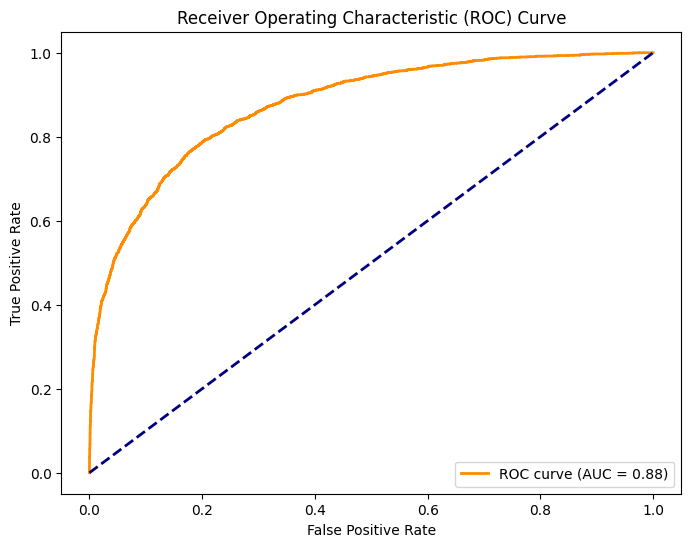

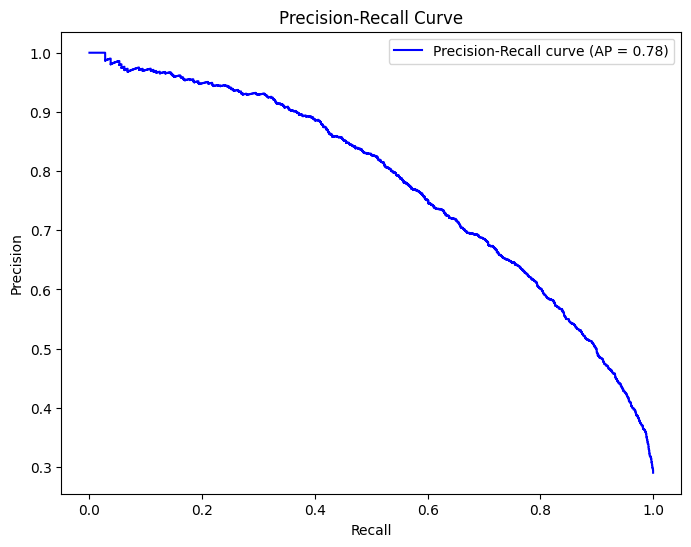

Area under ROC curve (AUC-ROC): 0.88
Area under Precision-Recall curve (AUC-PR): 0.78
Confusion Matrix:
[[5751  753]
 [ 890 1769]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6504
           1       0.70      0.67      0.68      2659

    accuracy                           0.82      9163
   macro avg       0.78      0.77      0.78      9163
weighted avg       0.82      0.82      0.82      9163



In [33]:
# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in train_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = train_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_train = train_train_data[numeric_columns]
y_train = train_train_data['los_type']
X_test = test_train_data[numeric_columns]
y_test = test_train_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành số (0 và 1)
y_train = y_train.map({'Short': 0, 'Long': 1})
y_test = y_test.map({'Short': 0, 'Long': 1})

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Chuẩn hóa các tính năng nếu cần (tùy chọn nhưng thường có lợi)
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Tạo mô hình và huấn luyện
model = XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train_res, y_train_res)

# Đưa ra dự đoán trên tập kiểm tra
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.4
y_pred = (y_pred_prob >= threshold).astype(int)

# Tạo đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tạo đường cong độ chính xác-thu hồi
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC): {roc_auc:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR): {average_precision:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(cr)


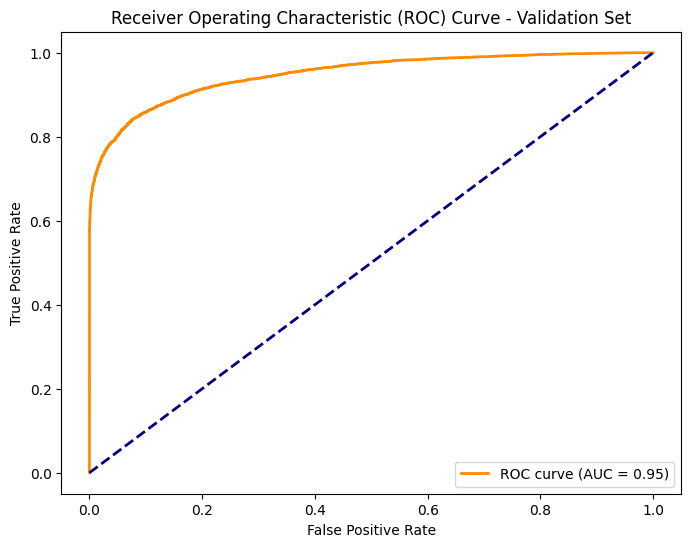

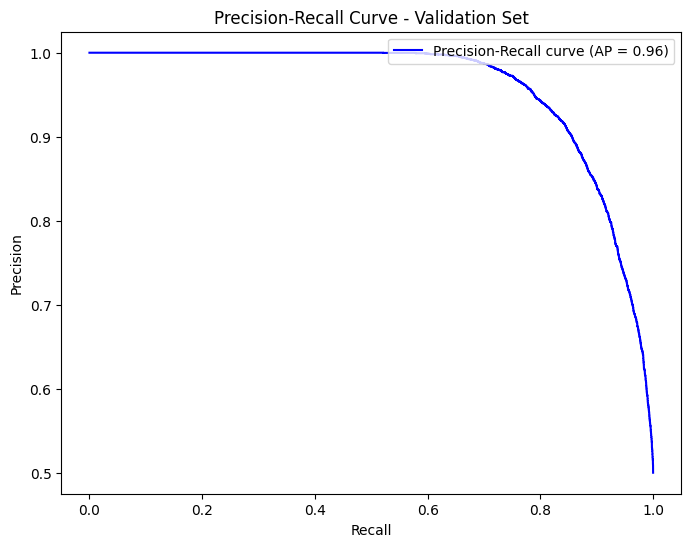

Area under ROC curve (AUC-ROC) for Verification Set: 0.95
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.96
Confusion Matrix for Test Set:
[[7355  947]
 [1099 7203]]

Classification Report for Test Set:

TABLE VII:ClassificationReport forBaseline:MeanImputation

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      8302
           1       0.88      0.87      0.88      8302

    accuracy                           0.88     16604
   macro avg       0.88      0.88      0.88     16604
weighted avg       0.88      0.88      0.88     16604



In [34]:
# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})


# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_verify_res , y_verify = smote.fit_resample(X_verify, y_verify)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
X_verify_res = scaler.transform(X_verify_res)

# Đưa ra dự đoán về tập xác minh bằng cách sử dụng mô hình hiện có
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify, y_verify_pred_prob)


# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify, y_verify_pred)
cr_verify = classification_report(y_verify, y_verify_pred)



print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print()
print('TABLE VII:ClassificationReport forBaseline:MeanImputation')
print()
print(cr_verify)


In [35]:
#Đảm bảo kích thước khớp
min_len = min(len(y_true), len(y_verify_pred))
y_true = y_true[:min_len]
y_verify_pred = y_verify_pred[:min_len]

import pandas as pd

# Chuyển y_verify_pred sang Series với chỉ số tương ứng
y_verify_pred_series = pd.Series(y_verify_pred, index=validation_data.index[:len(y_verify_pred)])

# Đồng bộ hóa y_true với y_verify_pred
y_true = validation_data.loc[y_verify_pred_series.index, 'los_type'].map({'Short': 0, 'Long': 1})

# 'validation_data' có các dự đoán được lưu trữ trong 'y_verify_pred'
cm_verify = confusion_matrix(y_true, y_verify_pred)

# Trích xuất các giá trị từ ma trận nhầm lẫn
tn, fp, fn, tp = cm_verify.ravel()

#  Tính toán tỷ lệ cược cân bằng
equalized_odds_race = (tp / (tp + fn)) / (fp / (fp + tn))

print(equalized_odds_race)


5.912938094141767


# Nolm

In [36]:
icu_data = pd.read_csv('/kaggle/input/icu-dataset/icu_data_Nolm.csv')
icu_data.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,age,gender,...,zafirlukast,zanamivir,zeas,zileuton,zinc oxide,zinc oxide-white petrolatum,zolmitriptan,zonisamide,zydis,zz
0,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,55,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,77,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,57,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,81,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
condition = (icu_data['los'] > 4).map({True: 'Long', False: 'Short'})

# Tạo một cột mới 'los_type' dựa trên điều kiện
icu_data['los_type'] = condition

In [38]:
# Chia dữ liệu thành dữ liệu training  và dữ liệu validation
from sklearn.model_selection import train_test_split

# Giả sử 'subject_id' là mã định danh bệnh nhân
patient_ids = icu_data['subject_id'].unique()

# Chia patient_ids thành các tập huấn luyện và thử nghiệm
train_patient_ids, validation_patient_ids = train_test_split(patient_ids, test_size=0.1, random_state=42)

# Lọc khung dữ liệu dựa trên sự phân chia của patient_ids
train_data = icu_data[icu_data['subject_id'].isin(train_patient_ids)]
validation_data = icu_data[icu_data['subject_id'].isin(validation_patient_ids)]

# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra
print("Training set shape:", train_data.shape)
print("Validation set shape:", validation_data.shape)

Training set shape: (51697, 5075)
Validation set shape: (5790, 5075)


In [39]:
# lấy cột subject_id duy nhất
patient_ids_train = train_data['subject_id'].unique()

# Chia patient_ids_train thành các tập huấn luyện và thử nghiệm
train_train_ids, test_train_ids = train_test_split(patient_ids_train, test_size=0.1, random_state=42)

# Lọc train_data dựa trên sự phân chia của patient_ids_train
train_train_data = train_data[train_data['subject_id'].isin(train_train_ids)]
test_train_data = train_data[train_data['subject_id'].isin(test_train_ids)]

# Kiểm tra hình dạng của tập huấn luyện và tập kiểm tra
print("Train Training set shape:", train_train_data.shape)
print("Train Testing set shape:", test_train_data.shape)

Train Training set shape: (46625, 5075)
Train Testing set shape: (5072, 5075)


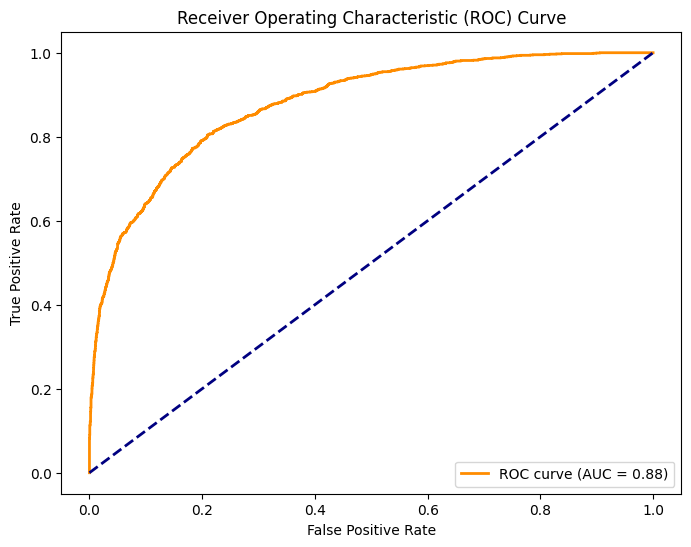

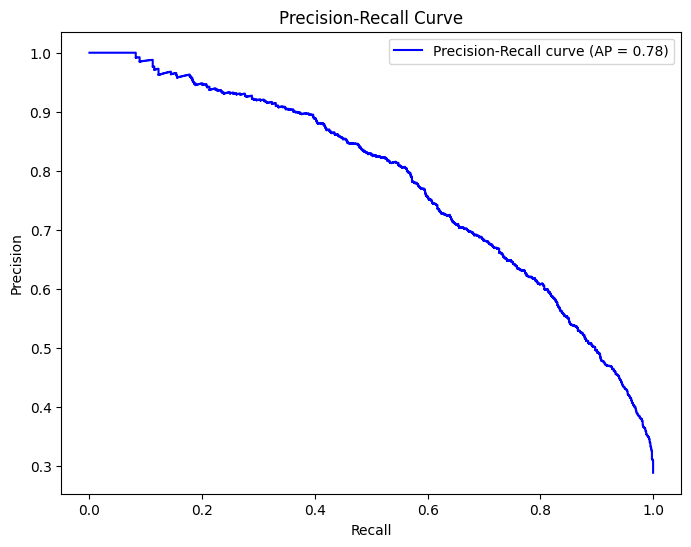

Area under ROC curve (AUC-ROC): 0.88
Area under Precision-Recall curve (AUC-PR): 0.78
Confusion Matrix:
[[3169  442]
 [ 464  997]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3611
           1       0.69      0.68      0.69      1461

    accuracy                           0.82      5072
   macro avg       0.78      0.78      0.78      5072
weighted avg       0.82      0.82      0.82      5072



In [44]:
# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in train_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = train_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_train = train_train_data[numeric_columns]
y_train = train_train_data['los_type']
X_test = test_train_data[numeric_columns]
y_test = test_train_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành số (0 và 1)
y_train = y_train.map({'Short': 0, 'Long': 1})
y_test = y_test.map({'Short': 0, 'Long': 1})

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Chuẩn hóa các tính năng nếu cần (tùy chọn nhưng thường có lợi)
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Tạo mô hình và huấn luyện
model = XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train_res, y_train_res)

# Đưa ra dự đoán trên tập kiểm tra
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
threshold = 0.4
y_pred = (y_pred_prob >= threshold).astype(int)

# Tạo đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Tạo đường cong độ chính xác-thu hồi
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Vẽ đường cong ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC): {roc_auc:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR): {average_precision:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(cr)


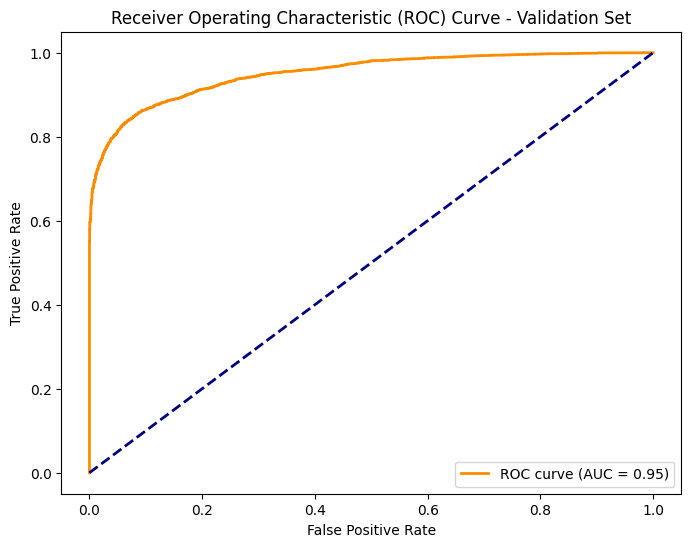

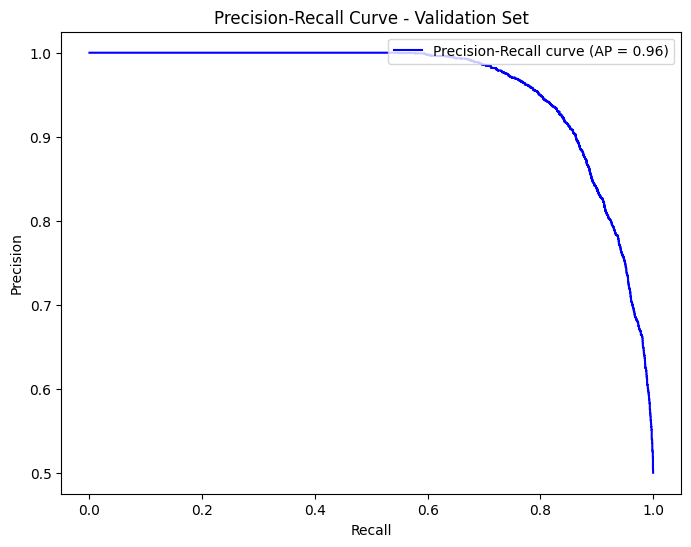

Area under ROC curve (AUC-ROC) for Verification Set: 0.95
Area under Precision-Recall curve (AUC-PR) for Verification Set: 0.96
Confusion Matrix for Test Set:
[[3669  468]
 [ 533 3604]]

Classification Report for Test Set:

TABLE VII:ClassificationReport forBaseline:MeanImputation

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4137
           1       0.89      0.87      0.88      4137

    accuracy                           0.88      8274
   macro avg       0.88      0.88      0.88      8274
weighted avg       0.88      0.88      0.88      8274



In [45]:
# Các cột cần loại trừ khỏi các tính năng
exclude_columns = ['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit', 'intime', 'outtime', 'los', 'los_type',
                   'age', 'gender', 'insurance', 'race', 'PHYSICIAN REFERRAL']

# Xác định các cột tính năng của bạn (loại trừ các cột nhất định)
feature_columns = [col for col in validation_data.columns if col not in exclude_columns]

# Loại trừ các cột không phải số trước khi chia tỷ lệ
numeric_columns = validation_data[feature_columns].select_dtypes(include=['float64', 'int64']).columns
X_verify = validation_data[numeric_columns]
y_verify = validation_data['los_type']

# Chuyển đổi 'Short' và 'Long' thành nhãn số (0 và 1)
y_verify = y_verify.map({'Short': 0, 'Long': 1})


# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_verify_res , y_verify = smote.fit_resample(X_verify, y_verify)

# Chuẩn hóa các tính năng bằng cách sử dụng cùng một bộ chia tỷ lệ từ tập huấn luyện
X_verify_res = scaler.transform(X_verify_res)

# Đưa ra dự đoán về tập xác minh bằng cách sử dụng mô hình hiện có
y_verify_pred_prob = model.predict_proba(X_verify_res)[:, 1]

# Chuyển đổi điểm xác suất thành dự đoán nhị phân bằng cách sử dụng ngưỡng
y_verify_pred = (y_verify_pred_prob > threshold).astype(int)

# Tạo đường cong ROC cho tập xác minh
fpr_verify, tpr_verify, thresholds_verify = roc_curve(y_verify, y_verify_pred_prob)
roc_auc_verify = auc(fpr_verify, tpr_verify)

# Tạo đường cong độ chính xác-thu hồi cho tập xác minh
precision_verify, recall_verify, _ = precision_recall_curve(y_verify, y_verify_pred_prob)
average_precision_verify = average_precision_score(y_verify, y_verify_pred_prob)


# Vẽ đường cong ROC cho tập xác minh
plt.figure(figsize=(8, 6))
plt.plot(fpr_verify, tpr_verify, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_verify))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Vẽ đường cong độ chính xác-thu hồi cho tập xác minh
plt.figure(figsize=(8, 6))
plt.step(recall_verify, precision_verify, color='b', where='post', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision_verify))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Validation Set')
plt.legend(loc='upper right')
plt.show()

print(f'Area under ROC curve (AUC-ROC) for Verification Set: {roc_auc_verify:.2f}')
print(f'Area under Precision-Recall curve (AUC-PR) for Verification Set: {average_precision_verify:.2f}')

# Tạo ma trận nhầm lẫn và báo cáo phân loại cho tập xác minh
cm_verify = confusion_matrix(y_verify, y_verify_pred)
cr_verify = classification_report(y_verify, y_verify_pred)



print("Confusion Matrix for Test Set:")
print(cm_verify)

print("\nClassification Report for Test Set:")
print()
print('TABLE VII:ClassificationReport forBaseline:MeanImputation')
print()
print(cr_verify)


In [50]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Đảm bảo kích thước khớp giữa y_true và y_verify_pred
min_len = min(len(y_true), len(y_verify_pred), len(validation_data))

# Cắt y_true và y_verify_pred sao cho khớp với validation_data
y_true = y_true[:min_len]
y_verify_pred = y_verify_pred[:min_len]
# Đồng bộ hóa chỉ số của y_verify_pred với validation_data
y_verify_pred_series = pd.Series(y_verify_pred, index=validation_data.index[:min_len])

# Đồng bộ hóa y_true với y_verify_pred (dùng chỉ số của y_verify_pred_series)
y_true = validation_data.loc[y_verify_pred_series.index, 'los_type'].map({'Short': 0, 'Long': 1})

# Kiểm tra kích thước của y_true và y_verify_pred để đảm bảo chúng khớp
assert len(y_true) == len(y_verify_pred), "y_true và y_verify_pred không khớp kích thước!"

# Tính ma trận nhầm lẫn
cm_verify = confusion_matrix(y_true, y_verify_pred)

# Trích xuất các giá trị từ ma trận nhầm lẫn
tn, fp, fn, tp = cm_verify.ravel()

# Tính tỷ lệ cược cân bằng
if (tp + fn) > 0 and (fp + tn) > 0:
    equalized_odds_race = (tp / (tp + fn)) / (fp / (fp + tn))
else:
    equalized_odds_race = None  # Tránh chia cho 0

print("Equalized Odds Race:", equalized_odds_race)


Equalized Odds Race: 6.021507127677728
